# Tutorial: TC risk and adaptation options in the Caribbean - Dominica example

## Exposure 

In [1]:
%matplotlib inline
import numpy as np
from climada.entity.exposures import LitPop

In [2]:
import os
from climada.util import save, load

abs_path = os.path.join(os.getcwd(), 'results/exp_dma.h5') # read exposure
exp = load(abs_path)

In [3]:
## Uncomment if you are interested in displaying the exposure
#exp.plot_raster() 
#exp.plot_scatter()

# Hazard

In [4]:
abs_path = os.path.join(os.getcwd(), 'results/tc_dma.h5')
tc = load(abs_path)

In [6]:
## Uncomment if you are interested in displaying the hazard
#tc.plot_rp_intensity()

# Impact 

In [5]:
abs_path = os.path.join(os.getcwd(), 'results/imp_dma.csv')
imp = load(abs_path)

/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)


<GeoAxesSubplot:title={'center':'Expected annual impact'}>

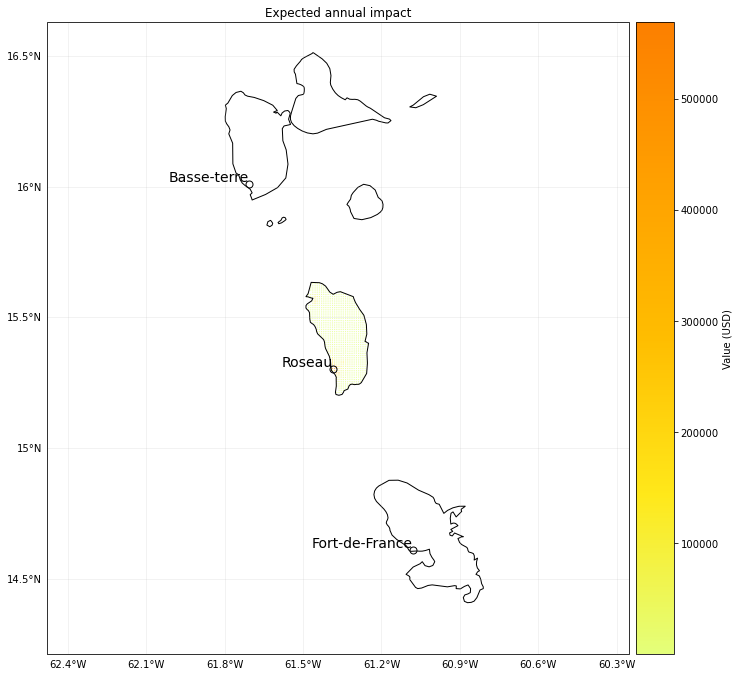

In [6]:
imp.plot_hexbin_eai_exposure(buffer=1)
#imp.plot_raster_eai_exposure()

In [7]:
from climada.entity.impact_funcs.trop_cyclone import ImpfSetTropCyclone
from climada.entity import ImpactFuncSet
import matplotlib.pyplot as plt

# generate the default calibrated TC impact functions for different regions
imp_fun = ImpfSetTropCyclone()
imp_fun.set_calibrated_regional_ImpfSet()

{'NA1': 66.3,
 'NA2': 89.2,
 'NI': 70.8,
 'OC': 64.1,
 'SI': 52.4,
 'WP1': 66.4,
 'WP2': 188.4,
 'WP3': 112.8,
 'WP4': 190.5,
 'ROW': 110.1}

# Damages 2030 (1.4°C)

In [8]:
import copy
tc_fut = copy.deepcopy(tc)
tc_fut.intensity.data += 0.3 # increase of intensity by 0.3%

In [9]:
# present exposure - 2020 and future exposure - 2030
exp_20 = copy.deepcopy(exp)
exp_20.ref_year = 2020
exp_20.gdf.value = exp_20.gdf.value*1.02**(2020-2014) # Litpop 2014 values * 2% annual growth rate

exp_30 = copy.deepcopy(exp)
exp_30.ref_year = 2030
exp_30.gdf.value = exp_30.gdf.value*1.02**(2030-2014) # Litpop 2014 values * 2% annual growth rate

In [11]:
# Sample centroids 

tc.centroids.set_dist_coast()
tc.centroids.dist_coast < 1000 # centroids less than 1km to the coast 
num_cen_coast = np.argwhere(tc.centroids.dist_coast < 1000).size

# 36% of coastal assets 

x_list = list(range(0,num_cen_coast))
m = 0

for x in range(0,548): 
    if tc.centroids.dist_coast[x] < 1000: 
        exp_30.gdf['region_id'][x] = 1
        x_list[m] = x
        m = m +1
    else: 
        exp_30.gdf['region_id'][x] = 0

exp_20.gdf['region_id'] = exp_30.gdf['region_id']

# Sample 36%
from random import sample
l_36 = sample(x_list,k=81) 

exp_20.gdf['region_id'][l_36] = 2
exp_30.gdf['region_id'][l_36] = 2

2021-10-30 21:15:02,740 - climada.util.coordinates - INFO - dist_to_coast: UTM 32620 (1/1)


/Applications/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Applications/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [12]:
# Sample 24%
l_x24 = []
  
for i in x_list:
    if i not in l_36:
        l_x24.append(i)

In [13]:
l_24 = sample(l_x24,k=46)

exp_20.gdf['region_id'][l_24] = 3
exp_30.gdf['region_id'][l_24] = 3

In [14]:
# Sample 10%
l_x10 = []
  
for i in x_list:
    if i not in l_24:
        l_x10.append(i)

In [15]:
l_10 = sample(l_x10,k=19)

exp_20.gdf['region_id'][l_10] = 4
exp_30.gdf['region_id'][l_10] = 4

In [16]:
# Sample 1%
l_x001 = []
  
for i in x_list:
    if i not in l_10:
        l_x001.append(i)

In [17]:
l_001 = sample(l_x001,k=1)

exp_20.gdf['region_id'][l_001] = 5
exp_30.gdf['region_id'][l_001] = 5

In [18]:
%matplotlib inline
from climada.entity import Entity
from climada.entity.exposures import LitPop

ent_20 = Entity()
ent_20.exposures = exp_20
ent_30 = Entity()
ent_30.exposures = exp_30

2021-10-30 21:15:03,460 - climada.entity.exposures.base - INFO - meta set to default value {}
2021-10-30 21:15:03,461 - climada.entity.exposures.base - INFO - tag set to default value  File: 
 Description: 
2021-10-30 21:15:03,461 - climada.entity.exposures.base - INFO - ref_year set to default value 2018
2021-10-30 21:15:03,462 - climada.entity.exposures.base - INFO - value_unit set to default value USD
2021-10-30 21:15:03,462 - climada.entity.exposures.base - INFO - crs set to default value: EPSG:4326
2021-10-30 21:15:03,473 - climada.entity.exposures.base - INFO - meta set to default value {}
2021-10-30 21:15:03,474 - climada.entity.exposures.base - INFO - tag set to default value  File: 
 Description: 
2021-10-30 21:15:03,474 - climada.entity.exposures.base - INFO - ref_year set to default value 2018
2021-10-30 21:15:03,475 - climada.entity.exposures.base - INFO - value_unit set to default value USD
2021-10-30 21:15:03,475 - climada.entity.exposures.base - INFO - crs set to default

/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:219: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf.crs = self.meta['crs']


In [19]:
ent_20.impact_funcs = imp_fun
ent_30.impact_funcs = imp_fun

In [20]:
from climada.entity import Measure, MeasureSet

meas_0 = Measure()
meas_0.name = 'Current Adaptation'
meas_0.haz_type = 'TC'
meas_0.cost = 1

meas_set = MeasureSet()
meas_set.append(meas_0)
meas_set.check()

ent_20.measures = meas_set
ent_30.measures = meas_set

2021-10-30 21:15:03,494 - climada.util.checker - ERROR - Invalid Measure.color_rgb size: 3 != 4.


In [21]:
ent_20.exposures.ref_year = 2020
ent_30.exposures.ref_year = 2030

In [22]:
# define discount rates
import numpy as np
from climada.entity import DiscRates

disc_rate = DiscRates()
disc_rate.years = np.arange(2000, 2101)
disc_rate.rates = np.zeros(disc_rate.years.size) # 0%

ent_20.disc_rates = disc_rate
ent_30.disc_rates = disc_rate

2021-10-30 21:15:04,072 - climada.entity.exposures.base - INFO - Matching 884 exposures with 884 centroids.
2021-10-30 21:15:04,075 - climada.engine.impact - INFO - Calculating damage for 874 assets (>0) and 3906 events.
2021-10-30 21:15:04,076 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-30 21:15:04,090 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:04,091 - climada.engine.impact - INFO - Calculating damage for 874 assets (>0) and 3906 events.
2021-10-30 21:15:04,092 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-30 21:15:04,101 - climada.entity.exposures.base - INFO - Matching 884 exposures with 884 centroids.
2021-10-30 21:15:04,103 - climada.engine.impact - INFO - Calculating damage for 874 assets (>0) and 3906 events.
2021-10-30 21:15:04,103 - climada.engine.impact - INFO - Mi

<AxesSubplot:title={'center':'Risk at 2020 and 2030'}, ylabel='Impact (USD m)'>

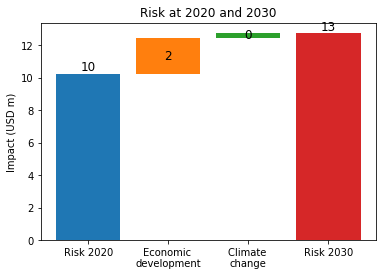

In [23]:
from climada.engine import CostBenefit,risk_aai_agg

cost_ben = CostBenefit()
cost_ben.calc(tc, ent_20, tc_fut, ent_30) # prints costs and benefits
cost_ben.plot_waterfall(tc, ent_20, tc_fut, ent_30, risk_func=risk_aai_agg)

In [24]:
import matplotlib.colors as colors

In [25]:
# Specify Adaptation options

meas_set = MeasureSet()

meas_1 = Measure()
meas_1.name = 'Retrofitting'
meas_1.haz_type = 'TC'
meas_1.color_rgb = colors.to_rgb('deepskyblue')
meas_1.cost = 0.1*sum(exp_20.gdf.value) # 10% of housing value
meas_1.hazard_freq_cutoff = 1/100

meas_set.append(meas_1)
meas_set.check()

meas_2 = Measure()
meas_2.name = 'Seawalls'
meas_2.haz_type = 'TC'
meas_2.color_rgb = colors.to_rgb('orange')
meas_2.cost = 0.1*152*49000000
meas_2.hazard_freq_cutoff = 1/100
meas_2.exp_region_id = [4]

meas_set.append(meas_2)
meas_set.check()

meas_5 = Measure()
meas_5.name = 'Levees'
meas_5.haz_type = 'TC'
meas_5.color_rgb = colors.to_rgb('red')
meas_5.cost = 0.1*152*49000000 # 10% of coastline 
meas_5.hazard_freq_cutoff = 1/50
meas_5.exp_region_id = [4]

meas_set.append(meas_5)
meas_set.check()


In [26]:
meas_6 = Measure()
meas_6.haz_type = 'TC'
meas_6.name = 'Risk transfer'
meas_6.color_rgb = colors.to_rgb('royalblue')


meas_6.risk_transf_attach = imp.calc_freq_curve(12).impact
meas_6.risk_transf_cover = imp.calc_freq_curve(50).impact
meas_6.risk_transf_cost_factor = 1.5
# cost: only structuring and transaction costs, expected loss will be added to come to total cost of risk transfer
meas_6.cost = 100000 + 0.02*meas_6.risk_transf_cover

meas_set.append(meas_6)
meas_set.check()

ent_20.measures = meas_set
ent_30.measures = meas_set

2021-10-30 21:15:04,971 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:04,973 - climada.engine.impact - INFO - Calculating damage for 874 assets (>0) and 3906 events.
2021-10-30 21:15:04,973 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-30 21:15:04,982 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:04,983 - climada.engine.impact - INFO - Calculating damage for 874 assets (>0) and 3906 events.
2021-10-30 21:15:04,984 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-30 21:15:05,003 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:05,005 - climada.engine.impact - INFO - Calculating damage for 874 assets (>0) and 3906 events.
2021-10-30 21:15:05,005 - climada.engine.impact - INFO - Missing ex

/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/measures/base.py:357: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  new_exp.gdf = GeoDataFrame(


2021-10-30 21:15:05,225 - climada.entity.exposures.base - INFO - meta set to default value {}
2021-10-30 21:15:05,225 - climada.entity.exposures.base - INFO - tag set to default value  File: 
 Description: 
2021-10-30 21:15:05,226 - climada.entity.exposures.base - INFO - ref_year set to default value 2018
2021-10-30 21:15:05,226 - climada.entity.exposures.base - INFO - value_unit set to default value USD
2021-10-30 21:15:05,227 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:05,228 - climada.engine.impact - INFO - Calculating damage for 17 assets (>0) and 3906 events.
2021-10-30 21:15:05,229 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-30 21:15:05,415 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:05,416 - climada.engine.impact - INFO - Calculating damage for 874 assets (>0) and 3906 events.
2021-10-30 21:15:0

/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/measures/base.py:357: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  new_exp.gdf = GeoDataFrame(


2021-10-30 21:15:05,428 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:05,429 - climada.engine.impact - INFO - Calculating damage for 874 assets (>0) and 3906 events.
2021-10-30 21:15:05,430 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-30 21:15:05,443 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:05,444 - climada.engine.impact - INFO - Calculating damage for 874 assets (>0) and 3906 events.
2021-10-30 21:15:05,445 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-30 21:15:05,451 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:05,453 - climada.engine.impact - INFO - Calculating damage for 874 assets (>0) and 3906 events.
2021-10-30 21:15:05,453 - climada.engine.impact - INFO - Missing ex

/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/measures/base.py:357: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  new_exp.gdf = GeoDataFrame(


2021-10-30 21:15:05,690 - climada.entity.exposures.base - INFO - meta set to default value {}
2021-10-30 21:15:05,691 - climada.entity.exposures.base - INFO - tag set to default value  File: 
 Description: 
2021-10-30 21:15:05,691 - climada.entity.exposures.base - INFO - ref_year set to default value 2018
2021-10-30 21:15:05,691 - climada.entity.exposures.base - INFO - value_unit set to default value USD
2021-10-30 21:15:05,692 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:05,693 - climada.engine.impact - INFO - Calculating damage for 17 assets (>0) and 3906 events.
2021-10-30 21:15:05,694 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-30 21:15:05,880 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:05,882 - climada.engine.impact - INFO - Calculating damage for 874 assets (>0) and 3906 events.
2021-10-30 21:15:0

/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/measures/base.py:357: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  new_exp.gdf = GeoDataFrame(


2021-10-30 21:15:05,894 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:05,896 - climada.engine.impact - INFO - Calculating damage for 874 assets (>0) and 3906 events.
2021-10-30 21:15:05,896 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-30 21:15:05,909 - climada.engine.cost_benefit - INFO - Computing cost benefit from years 2020 to 2030.

Measure          Cost (USD m)    Benefit (USD m)    Benefit/Cost
-------------  --------------  -----------------  --------------
Retrofitting         110.95            70.7496       0.637672
Seawalls             744.8              0.279039     0.00037465
Levees               744.8              0.147733     0.000198353
Risk transfer         99.2963          63.6022       0.640529

--------------------  ---------  -------
Total climate risk:   126.252    (USD m)
Average annual risk:   12.7355   (USD m)
Residual risk:         

<AxesSubplot:xlabel='Return Period (2030)', ylabel='Impact (USD)'>

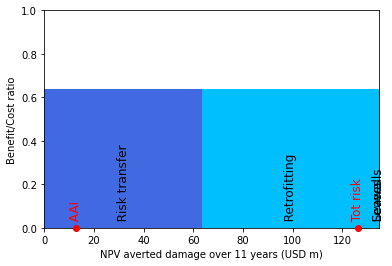

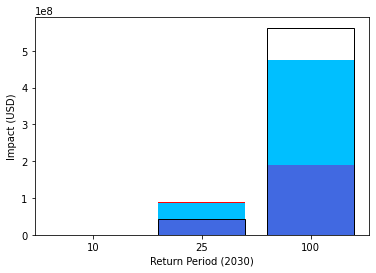

In [27]:
cost_ben = CostBenefit()
cost_ben.calc(tc, ent_20, tc_fut, ent_30) 

cost_ben.plot_cost_benefit() # plot benefit/cost ratio per measure
cost_ben.plot_event_view([10, 25, 100])

# Damages 2100 - 3°C 

In [28]:
tc_fut = copy.deepcopy(tc)
tc_fut.intensity.data += 1.9

In [29]:
exp_10 = copy.deepcopy(exp_30)
exp_10.ref_year = 2100
exp_10.gdf.value = exp_10.gdf.value*1.02**(2100-2014) # Litpop 2014values * 2% annual growth rate

In [30]:
ent_10 = Entity()
ent_10.exposures = exp_10
ent_10.impact_funcs = imp_fun
ent_10.measures = meas_set
ent_10.exposures.ref_year = 2100
ent_10.disc_rates = disc_rate

2021-10-30 21:15:06,161 - climada.entity.exposures.base - INFO - meta set to default value {}
2021-10-30 21:15:06,161 - climada.entity.exposures.base - INFO - tag set to default value  File: 
 Description: 
2021-10-30 21:15:06,162 - climada.entity.exposures.base - INFO - ref_year set to default value 2018
2021-10-30 21:15:06,162 - climada.entity.exposures.base - INFO - value_unit set to default value USD
2021-10-30 21:15:06,163 - climada.entity.exposures.base - INFO - crs set to default value: EPSG:4326


/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:219: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf.crs = self.meta['crs']


In [31]:
# Adaptation options

meas_set = MeasureSet()

meas_1 = Measure()
meas_1.name = 'Retrofitting'
meas_1.haz_type = 'TC'
meas_1.color_rgb = colors.to_rgb('deepskyblue')
meas_1.cost = 0.1*sum(exp_20.gdf.value)+0.1*sum(exp_20.gdf.value)*1.02**30+0.1*sum(exp_20.gdf.value)*1.02**60 # 10% of housing value
meas_1.hazard_freq_cutoff = 1/100
#meas_1.exp_region_id = [1]

meas_set.append(meas_1)
meas_set.check()

meas_2 = Measure()
meas_2.name = 'Seawalls'
meas_2.haz_type = 'TC'
meas_2.color_rgb = colors.to_rgb('orange')
meas_2.cost = 0.1*152*49000000+81*1000
meas_2.hazard_freq_cutoff = 1/100
meas_2.exp_region_id = [4]

meas_set.append(meas_2)
meas_set.check()


meas_5 = Measure()
meas_5.name = 'Levees'
meas_5.haz_type = 'TC'
meas_5.color_rgb = colors.to_rgb('red')
meas_5.cost = 0.1*152*49000000+81*500 # 10% of coastline 
meas_5.hazard_freq_cutoff = 1/50
meas_5.exp_region_id = [4]

meas_set.append(meas_5)
meas_set.check()

meas_6 = Measure()
meas_6.haz_type = 'TC'
meas_6.name = 'Risk transfer'
meas_6.color_rgb = colors.to_rgb('royalblue')


meas_6.risk_transf_attach = imp.calc_freq_curve(12).impact
meas_6.risk_transf_cover = imp.calc_freq_curve(50).impact
meas_6.risk_transf_cost_factor = 1.5
# cost: only structuring and transaction costs, expected loss will be added to come to total cost of risk transfer
meas_6.cost = 100000 + 0.02*meas_6.risk_transf_cover

meas_set.append(meas_6)
meas_set.check()

ent_10.measures = meas_set

2021-10-30 21:15:06,342 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:06,344 - climada.engine.impact - INFO - Calculating damage for 874 assets (>0) and 3906 events.
2021-10-30 21:15:06,344 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-30 21:15:06,352 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:06,353 - climada.engine.impact - INFO - Calculating damage for 874 assets (>0) and 3906 events.
2021-10-30 21:15:06,354 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-30 21:15:06,371 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:06,372 - climada.engine.impact - INFO - Calculating damage for 874 assets (>0) and 3906 events.
2021-10-30 21:15:06,372 - climada.engine.impact - INFO - Missing ex

/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/measures/base.py:357: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  new_exp.gdf = GeoDataFrame(


2021-10-30 21:15:06,589 - climada.entity.exposures.base - INFO - meta set to default value {}
2021-10-30 21:15:06,589 - climada.entity.exposures.base - INFO - tag set to default value  File: 
 Description: 
2021-10-30 21:15:06,589 - climada.entity.exposures.base - INFO - ref_year set to default value 2018
2021-10-30 21:15:06,590 - climada.entity.exposures.base - INFO - value_unit set to default value USD
2021-10-30 21:15:06,591 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:06,592 - climada.engine.impact - INFO - Calculating damage for 17 assets (>0) and 3906 events.
2021-10-30 21:15:06,593 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-30 21:15:06,786 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:06,787 - climada.engine.impact - INFO - Calculating damage for 874 assets (>0) and 3906 events.
2021-10-30 21:15:0

/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/measures/base.py:357: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  new_exp.gdf = GeoDataFrame(


2021-10-30 21:15:06,800 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:06,801 - climada.engine.impact - INFO - Calculating damage for 874 assets (>0) and 3906 events.
2021-10-30 21:15:06,802 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-30 21:15:06,816 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:06,818 - climada.engine.impact - INFO - Calculating damage for 874 assets (>0) and 3906 events.
2021-10-30 21:15:06,818 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-30 21:15:06,826 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:06,828 - climada.engine.impact - INFO - Calculating damage for 874 assets (>0) and 3906 events.
2021-10-30 21:15:06,828 - climada.engine.impact - INFO - Missing ex

/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/measures/base.py:357: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  new_exp.gdf = GeoDataFrame(


2021-10-30 21:15:07,072 - climada.entity.exposures.base - INFO - meta set to default value {}
2021-10-30 21:15:07,073 - climada.entity.exposures.base - INFO - tag set to default value  File: 
 Description: 
2021-10-30 21:15:07,073 - climada.entity.exposures.base - INFO - ref_year set to default value 2018
2021-10-30 21:15:07,073 - climada.entity.exposures.base - INFO - value_unit set to default value USD
2021-10-30 21:15:07,074 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:07,076 - climada.engine.impact - INFO - Calculating damage for 17 assets (>0) and 3906 events.
2021-10-30 21:15:07,076 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-30 21:15:07,266 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:07,267 - climada.engine.impact - INFO - Calculating damage for 874 assets (>0) and 3906 events.
2021-10-30 21:15:0

/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/measures/base.py:357: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  new_exp.gdf = GeoDataFrame(


2021-10-30 21:15:07,279 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:07,280 - climada.engine.impact - INFO - Calculating damage for 874 assets (>0) and 3906 events.
2021-10-30 21:15:07,281 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-30 21:15:07,295 - climada.engine.cost_benefit - INFO - Computing cost benefit from years 2020 to 2100.

Measure          Cost (USD bn)    Benefit (USD bn)    Benefit/Cost
-------------  ---------------  ------------------  --------------
Retrofitting          0.67595           2.10352         3.11194
Seawalls              0.744881          0.00807725      0.0108437
Levees                0.744841          0.00448881      0.00602654
Risk transfer         0.994194          0.660201        0.664056

--------------------  ---------  --------
Total climate risk:   3.59416    (USD bn)
Average annual risk:  0.0785254  (USD bn)
Residua

<AxesSubplot:xlabel='Return Period (2100)', ylabel='Impact (USD)'>

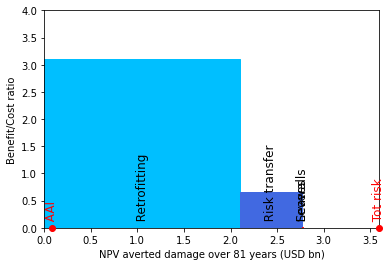

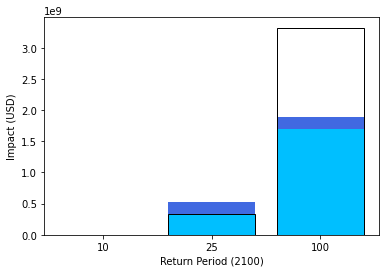

In [32]:
cost_ben = CostBenefit()
cost_ben.calc(tc, ent_20, tc_fut, ent_10) 

cost_ben.plot_cost_benefit() # plot benefit/cost ratio per measure
cost_ben.plot_event_view([10, 25, 100])

# Damages 2100 - 1.5°C 

In [33]:
tc_fut = copy.deepcopy(tc)
tc_fut.intensity.data += 0.4

In [34]:
ent_10.measures = meas_set

2021-10-30 21:15:07,555 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:07,556 - climada.engine.impact - INFO - Calculating damage for 874 assets (>0) and 3906 events.
2021-10-30 21:15:07,557 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-30 21:15:07,563 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:07,565 - climada.engine.impact - INFO - Calculating damage for 874 assets (>0) and 3906 events.
2021-10-30 21:15:07,565 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-30 21:15:07,581 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:07,582 - climada.engine.impact - INFO - Calculating damage for 874 assets (>0) and 3906 events.
2021-10-30 21:15:07,582 - climada.engine.impact - INFO - Missing ex

/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/measures/base.py:357: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  new_exp.gdf = GeoDataFrame(


2021-10-30 21:15:07,800 - climada.entity.exposures.base - INFO - meta set to default value {}
2021-10-30 21:15:07,800 - climada.entity.exposures.base - INFO - tag set to default value  File: 
 Description: 
2021-10-30 21:15:07,801 - climada.entity.exposures.base - INFO - ref_year set to default value 2018
2021-10-30 21:15:07,801 - climada.entity.exposures.base - INFO - value_unit set to default value USD
2021-10-30 21:15:07,802 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:07,803 - climada.engine.impact - INFO - Calculating damage for 17 assets (>0) and 3906 events.
2021-10-30 21:15:07,804 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-30 21:15:07,993 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:07,994 - climada.engine.impact - INFO - Calculating damage for 874 assets (>0) and 3906 events.
2021-10-30 21:15:0

/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/measures/base.py:357: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  new_exp.gdf = GeoDataFrame(


2021-10-30 21:15:08,006 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:08,007 - climada.engine.impact - INFO - Calculating damage for 874 assets (>0) and 3906 events.
2021-10-30 21:15:08,008 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-30 21:15:08,022 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:08,023 - climada.engine.impact - INFO - Calculating damage for 874 assets (>0) and 3906 events.
2021-10-30 21:15:08,023 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-30 21:15:08,030 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:08,031 - climada.engine.impact - INFO - Calculating damage for 874 assets (>0) and 3906 events.
2021-10-30 21:15:08,031 - climada.engine.impact - INFO - Missing ex

/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/measures/base.py:357: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  new_exp.gdf = GeoDataFrame(


2021-10-30 21:15:08,266 - climada.entity.exposures.base - INFO - meta set to default value {}
2021-10-30 21:15:08,266 - climada.entity.exposures.base - INFO - tag set to default value  File: 
 Description: 
2021-10-30 21:15:08,267 - climada.entity.exposures.base - INFO - ref_year set to default value 2018
2021-10-30 21:15:08,267 - climada.entity.exposures.base - INFO - value_unit set to default value USD
2021-10-30 21:15:08,268 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:08,270 - climada.engine.impact - INFO - Calculating damage for 17 assets (>0) and 3906 events.
2021-10-30 21:15:08,270 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-30 21:15:08,455 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:08,457 - climada.engine.impact - INFO - Calculating damage for 874 assets (>0) and 3906 events.
2021-10-30 21:15:0

/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/measures/base.py:357: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  new_exp.gdf = GeoDataFrame(


2021-10-30 21:15:08,470 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-30 21:15:08,472 - climada.engine.impact - INFO - Calculating damage for 874 assets (>0) and 3906 events.
2021-10-30 21:15:08,473 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-30 21:15:08,489 - climada.engine.cost_benefit - INFO - Computing cost benefit from years 2020 to 2100.

Measure          Cost (USD bn)    Benefit (USD bn)    Benefit/Cost
-------------  ---------------  ------------------  --------------
Retrofitting          0.67595           1.84056          2.72292
Seawalls              0.744881          0.00723488       0.0097128
Levees                0.744841          0.00385344       0.0051735
Risk transfer         0.947718          0.629216         0.663928

--------------------  ---------  --------
Total climate risk:   3.26682    (USD bn)
Average annual risk:  0.0704429  (USD bn)
Resi

<AxesSubplot:xlabel='Return Period (2100)', ylabel='Impact (USD)'>

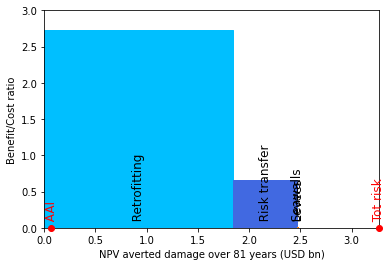

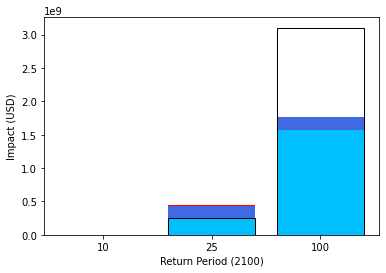

In [35]:
cost_ben = CostBenefit()
cost_ben.calc(tc, ent_20, tc_fut, ent_10) 

cost_ben.plot_cost_benefit() # plot benefit/cost ratio per measure
cost_ben.plot_event_view([10, 25, 100])